# Process Wikilinks for Network Analysis

In [ ]:
# Prep

from google.colab import drive
drive.mount('/content/drive')

!pip install pandas
!pip install networkx
!pip install matplotlib

## 1. Processing Rawdatas & Validate Format

In [7]:
import csv

# Specify the paths for the input and output files
input_file_path = '/content/drive/My Drive/Datasets/wiki-links/enwiki.wikilink_graph.2014-03-01.csv'
output_file_path = '/content/drive/My Drive/Datasets/wiki-links/enwiki.wikilink_graph.2014-03-01_modified.csv'

# Open the original file in read mode and the new file in write mode
with open(input_file_path, 'r', encoding='utf-8') as infile, open(output_file_path, 'w', encoding='utf-8', newline='') as outfile:
    # Read the file with tab delimiter
    reader = csv.reader(infile, delimiter='\t')
    # Create a writer for the new file with comma as delimiter
    writer = csv.writer(outfile, delimiter=',')

    # Loop through each row in the original file and write it to the new file
    for row in reader:
        writer.writerow(row)

print(f"Conversion complete. The file with commas has been saved as '{output_file_path}'.")

Conversion complete. The file with commas has been saved as '/content/drive/My Drive/Datasets/wiki-links/enwiki.wikilink_graph.2014-03-01_modified.csv'.


In [8]:
import pandas as pd

# Read the first few lines of the CSV file
with open('/content/drive/My Drive/Datasets/wiki-links/enwiki.wikilink_graph.2014-03-01_modified.csv', 'r') as file:
    first_lines = [next(file) for _ in range(5)]

# Print the first few lines
for line in first_lines:
    print(line)

page_id_from,page_title_from,page_id_to,page_title_to

12,Anarchism,10156432,Revolutions of 1848

12,Anarchism,3721152,1917 October Revolution

12,Anarchism,28357259,19th century philosophy

12,Anarchism,5013592,6 February 1934 crisis



In [9]:
# Open the CSV file and read the first few lines
with open('/content/drive/My Drive/Datasets/wiki-links/enwiki.wikilink_graph.2014-03-01_modified.csv', 'r') as file:
    first_lines = [next(file) for _ in range(5)]

# Print the first few lines as pure text
for line in first_lines:
    print(repr(line))

'page_id_from,page_title_from,page_id_to,page_title_to\n'
'12,Anarchism,10156432,Revolutions of 1848\n'
'12,Anarchism,3721152,1917 October Revolution\n'
'12,Anarchism,28357259,19th century philosophy\n'
'12,Anarchism,5013592,6 February 1934 crisis\n'


## 2. Subset the Political Key Nodes

In [10]:
import pandas as pd

# Assuming these are the correct paths for your environment
wiki2018_raw_path = '/content/drive/My Drive/Datasets/wiki-links/enwiki.wikilink_graph.2014-03-01_modified.csv'
keywords_path = '/content/drive/My Drive/Datasets/wiki-links/Politics of the United States.csv'
output_file_path = '/content/drive/My Drive/Datasets/wiki-links/filtered_enwiki_links_2014.csv'

# Reading the datasets
wiki2018_raw = pd.read_csv(wiki2018_raw_path)
keywords = pd.read_csv(keywords_path, header=None, names=['Politics_of_the_United_States'])

# Checking and keeping rows where BOTH 'page_title_from' AND 'page_title_to' are found in 'keywords'
filtered_wiki2018 = wiki2018_raw[
    (wiki2018_raw['page_title_from'].isin(keywords['Politics_of_the_United_States'])) &
    (wiki2018_raw['page_title_to'].isin(keywords['Politics_of_the_United_States']))
]

# Saving the filtered DataFrame to a new CSV file
filtered_wiki2018.to_csv(output_file_path, index=False)

print(f"Filter complete. The file with commas has been saved as '{output_file_path}'.")

Filter complete. The file with commas has been saved as '/content/drive/My Drive/Datasets/wiki-links/filtered_enwiki_links_2014.csv'.


# Network Analysis

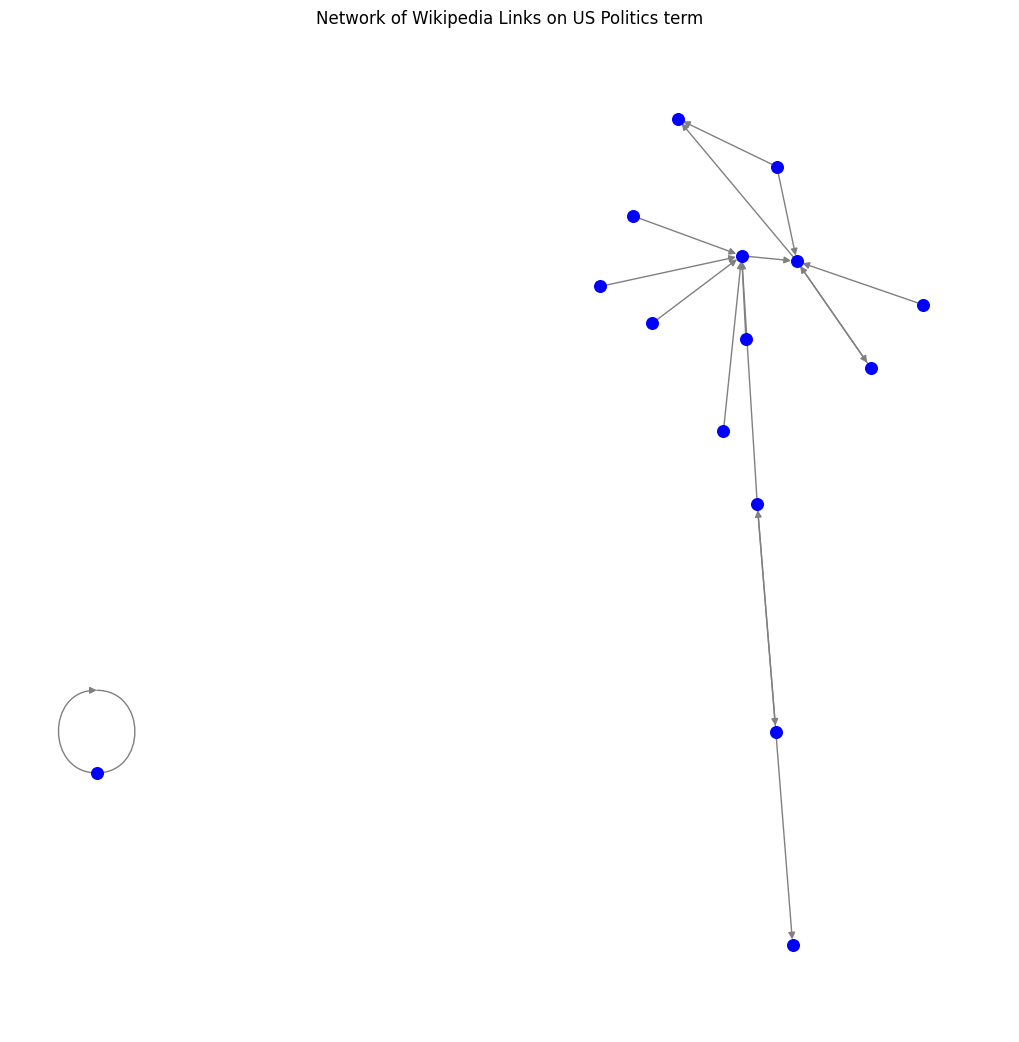

In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming the filtered dataset is stored at this location
file_path = '/content/drive/My Drive/Datasets/wiki-links/filtered_enwiki_links_2014.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Create a directed graph from the DataFrame
G = nx.from_pandas_edgelist(df, 'page_id_from', 'page_id_to', create_using=nx.DiGraph())

# Draw the network
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.20, iterations=20)
nx.draw(G, pos, with_labels=False, node_size=70, node_color='blue', edge_color='gray')

# Display the plot
plt.title('Network of Wikipedia Links on US Politics term')
plt.axis('off')
plt.show()

# 3. Save an an adjancy matrix if needed

In [17]:
import pandas as pd
import numpy as np

# Step 1: Read the CSV file
df = pd.read_csv('/content/drive/My Drive/Datasets/wiki-links/filtered_enwiki_links_2014.csv')

# Step 2: Identify unique nodes
nodes = pd.concat([df['page_id_from'], df['page_id_to']]).unique()
nodes.sort()  # Optional, to have ordered nodes
node_index = {node: i for i, node in enumerate(nodes)}  # Node to index mapping

# Step 3: Initialize an adjacency matrix
adj_matrix = np.zeros((len(nodes), len(nodes)), dtype=int)

# Step 4: Populate the adjacency matrix
for _, row in df.iterrows():
    source_idx = node_index[row['page_id_from']]
    target_idx = node_index[row['page_id_to']]
    adj_matrix[source_idx, target_idx] = 1  # unweighted edges

np.savetxt('/content/drive/My Drive/Datasets/wiki-links/adjacency_2014.txt', adj_matrix, fmt='%d')